In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date
from sklearn import preprocessing, svm
import seaborn as seabornInstance
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [75]:
df = pd.read_csv('hdfc.csv').set_index("Date")

In [76]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-08,527.500000,531.674988,527.125000,529.674988,514.235168,1481398.0
2016-04-11,530.150024,537.049988,521.424988,535.474976,519.866089,2024810.0
2016-04-12,534.799988,535.500000,529.625000,531.500000,516.007019,2470740.0
2016-04-13,536.000000,542.474976,534.750000,540.875000,525.108704,2487302.0
2016-04-18,541.750000,546.000000,535.799988,543.900024,528.045532,2058534.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 2016-04-08 to 2021-04-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1231 non-null   float64
 1   High       1231 non-null   float64
 2   Low        1231 non-null   float64
 3   Close      1231 non-null   float64
 4   Adj Close  1231 non-null   float64
 5   Volume     1231 non-null   float64
dtypes: float64(6)
memory usage: 67.4+ KB


In [78]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03
mean,989.961698,998.776969,979.585968,989.295126,981.253170,6.833438e+06
std,249.541615,252.057625,245.450189,248.502657,253.285241,8.308244e+06
min,527.500000,531.674988,521.424988,529.674988,514.235168,2.850040e+05
25%,838.137512,844.700012,829.024994,836.125000,825.643188,2.563807e+06
50%,1003.099976,1010.500000,993.000000,1002.000000,993.748108,4.607290e+06
75%,1142.974976,1153.549988,1133.750000,1143.474976,1135.635865,8.571770e+06
max,1621.199951,1641.000000,1608.449951,1626.650024,1626.650024,2.011300e+08


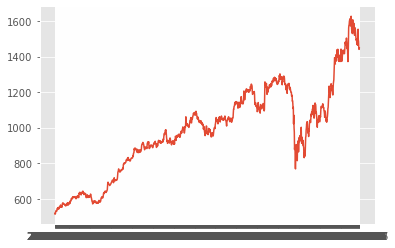

In [79]:
plt.plot(df['Adj Close'])

In [80]:
df['Range'] = (df['Close'] - df['Open'])/df['Open']*100

In [81]:
df['Volatility'] = (df['High'] - df['Low'])/df['Low']*100

In [82]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Range,Volatility
Date,,,,,,,,
2016-04-08,527.500000,531.674988,527.125000,529.674988,514.235168,1481398.0,0.412320,0.863171
2016-04-11,530.150024,537.049988,521.424988,535.474976,519.866089,2024810.0,1.004424,2.996596
2016-04-12,534.799988,535.500000,529.625000,531.500000,516.007019,2470740.0,-0.617051,1.109275
2016-04-13,536.000000,542.474976,534.750000,540.875000,525.108704,2487302.0,0.909515,1.444596
2016-04-18,541.750000,546.000000,535.799988,543.900024,528.045532,2058534.0,0.396866,1.903698


In [83]:
df['Candle'] = [0 if x<=0 else 1 for x in df['Range']]

In [84]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Range,Volatility,Candle
Date,,,,,,,,,
2016-04-08,527.500000,531.674988,527.125000,529.674988,514.235168,1481398.0,0.412320,0.863171,1
2016-04-11,530.150024,537.049988,521.424988,535.474976,519.866089,2024810.0,1.004424,2.996596,1
2016-04-12,534.799988,535.500000,529.625000,531.500000,516.007019,2470740.0,-0.617051,1.109275,0
2016-04-13,536.000000,542.474976,534.750000,540.875000,525.108704,2487302.0,0.909515,1.444596,1
2016-04-18,541.750000,546.000000,535.799988,543.900024,528.045532,2058534.0,0.396866,1.903698,1


In [85]:
df.dropna(inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Range,Volatility,Candle
Date,,,,,,,,,
2016-04-08,527.500000,531.674988,527.125000,529.674988,514.235168,1481398.0,0.412320,0.863171,1
2016-04-11,530.150024,537.049988,521.424988,535.474976,519.866089,2024810.0,1.004424,2.996596,1
2016-04-12,534.799988,535.500000,529.625000,531.500000,516.007019,2470740.0,-0.617051,1.109275,0
2016-04-13,536.000000,542.474976,534.750000,540.875000,525.108704,2487302.0,0.909515,1.444596,1
2016-04-18,541.750000,546.000000,535.799988,543.900024,528.045532,2058534.0,0.396866,1.903698,1


In [86]:
required_columns = ['Adj Close','Volume','Range','Volatility','Candle']

In [87]:
df=df[required_columns]

In [88]:
df.head()

,Adj Close,Volume,Range,Volatility,Candle
Date,,,,,
2016-04-08,514.235168,1481398.0,0.412320,0.863171,1
2016-04-11,519.866089,2024810.0,1.004424,2.996596,1
2016-04-12,516.007019,2470740.0,-0.617051,1.109275,0
2016-04-13,525.108704,2487302.0,0.909515,1.444596,1
2016-04-18,528.045532,2058534.0,0.396866,1.903698,1


In [89]:
duration = 10

In [90]:
forecast_col = 'Adj Close'

In [91]:
df['label'] = df[forecast_col].shift(-duration)

In [92]:
df.head()

,Adj Close,Volume,Range,Volatility,Candle,label
Date,,,,,,
2016-04-08,514.235168,1481398.0,0.412320,0.863171,1,545.714905
2016-04-11,519.866089,2024810.0,1.004424,2.996596,1,540.739319
2016-04-12,516.007019,2470740.0,-0.617051,1.109275,0,549.671204
2016-04-13,525.108704,2487302.0,0.909515,1.444596,1,542.535461
2016-04-18,528.045532,2058534.0,0.396866,1.903698,1,542.705383


In [93]:
df.dropna(inplace = True)
df.head()

,Adj Close,Volume,Range,Volatility,Candle,label
Date,,,,,,
2016-04-08,514.235168,1481398.0,0.412320,0.863171,1,545.714905
2016-04-11,519.866089,2024810.0,1.004424,2.996596,1,540.739319
2016-04-12,516.007019,2470740.0,-0.617051,1.109275,0,549.671204
2016-04-13,525.108704,2487302.0,0.909515,1.444596,1,542.535461
2016-04-18,528.045532,2058534.0,0.396866,1.903698,1,542.705383


In [94]:
X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
x = pd.DataFrame(preprocessing.scale(X))
y = np.array(df['label'])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
clf = LinearRegression()

In [97]:
clf.fit(X_train,y_train)
acc = clf.score(X_test, y_test)

In [98]:
print(acc)

0.9571211556121371
